In [5]:
#!pip install shap


In [ ]:
#!pip install shapimport numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics


In [6]:
#link para a base https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
base_red_wine = pd.read_csv('winequality-red.csv')

In [7]:
base_red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [37]:
df_train, df_test = train_test_split(base_red_wine, test_size=0.3)

df_train = df_train.reset_index(drop=True)

df_test = df_test.reset_index(drop=True)

In [38]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7
1,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.9,5
2,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9,6
3,7.6,0.290,0.49,2.7,0.092,25.0,60.0,0.99710,3.31,0.61,10.1,6
4,10.5,0.280,0.51,1.7,0.080,10.0,24.0,0.99820,3.20,0.89,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5
1115,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,5
1116,7.5,0.725,0.04,1.5,0.076,8.0,15.0,0.99508,3.26,0.53,9.6,5
1117,7.5,0.420,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5


In [39]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.8,0.450,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,10.800000,5
1,7.2,0.580,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.000000,5
2,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.200000,5
3,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.100000,7
4,6.5,0.520,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.300000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
475,7.1,0.690,0.08,2.1,0.063,42.0,52.0,0.99608,3.42,0.60,10.200000,6
476,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.200000,5
477,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6
478,7.7,0.580,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.500000,7


In [40]:
columns_features_train = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

columns_features_predict = columns_features_train

input_numbers = len(columns_features_train)

target_train = ['quality']

print(f'quantidade de colunas usadas na feature engineering: {input_numbers}')
print(f'lista de colunas usadas na feature engineering: \n{columns_features_train}')

quantidade de colunas usadas na feature engineering: 11
lista de colunas usadas na feature engineering: 
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [175]:
# ---------------- Configuração da rede neural ----------------
model = Sequential()
model.add(Dense(units = 4 * input_numbers, activation = 'linear', input_dim=input_numbers))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

In [181]:
# ---------------- treinamento da rede ----------------
model.fit(df_train[columns_features_train], df_train[target_train],
          epochs=150, verbose=1, use_multiprocessing=True, batch_size=50)

Epoch 1/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4321
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4184
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4118
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4162
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4154
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4243
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4354
Epoch 8/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4403
Epoch 9/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4267
Epoch 10/150
23/23 [==============================] - 0s 3ms/step - loss: 0.4080
Epoch 11/150
23/23 [==============================] - 0s 3ms/step - loss: 0.4101
Epoch 12/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4002
Epoch 13/150
23/23 [=================

23/23 [==============================] - 0s 2ms/step - loss: 0.4826
Epoch 103/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4734
Epoch 104/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4127
Epoch 105/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3614
Epoch 106/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 107/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4228
Epoch 108/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 109/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 110/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3605
Epoch 111/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3529
Epoch 112/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3909
Epoch 113/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3540
Epoch 114/150
23/23 [=========

In [182]:
# ---------------- Previsão dos dados de teste ----------------
Y_Predict = model.predict(df_test[columns_features_predict])

df_test['Y_Predict'] = pd.DataFrame(Y_Predict).astype(float)

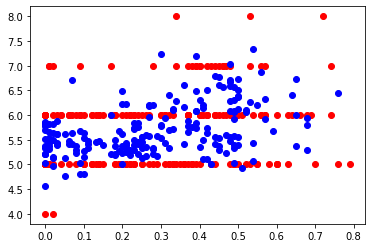

In [183]:
pyplot.scatter(df_train['citric acid'][:200], df_train['quality'][:200], color='red')

pyplot.scatter(df_test['citric acid'][:200], df_test['Y_Predict'][:200], color='blue')

In [184]:
mse = mean_squared_error(df_test['quality'], df_test['Y_Predict'])

r2_score = sklearn.metrics.r2_score(df_test['quality'], df_test['Y_Predict'])

print(f'Mean Square Error: {mse.round(2)}, R²: {r2_score.round(2)}')

Mean Square Error: 0.38, R²: 0.37


In [180]:
df_test.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Y_Predict
0,10.8,0.450,0.33,2.50,0.099,20.0,38.0,0.99818,3.24,0.71,10.8,5,6.499615
1,7.2,0.580,0.03,2.30,0.077,7.0,28.0,0.99568,3.35,0.52,10.0,5,5.703562
2,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,5,6.565857
3,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7,6.469289
4,6.5,0.520,0.11,1.80,0.073,13.0,38.0,0.99550,3.34,0.52,9.3,5,5.473685
5,8.2,0.600,0.17,2.30,0.072,11.0,73.0,0.99630,3.20,0.45,9.3,5,5.246919
6,9.3,0.400,0.49,2.50,0.085,38.0,142.0,0.99780,3.22,0.55,9.4,5,5.512828
7,8.5,0.370,0.20,2.80,0.090,18.0,58.0,0.99800,3.34,0.70,9.6,6,5.691487
8,9.1,0.340,0.42,1.80,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,5,6.652081
9,12.0,0.370,0.76,4.20,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,7,7.235392
